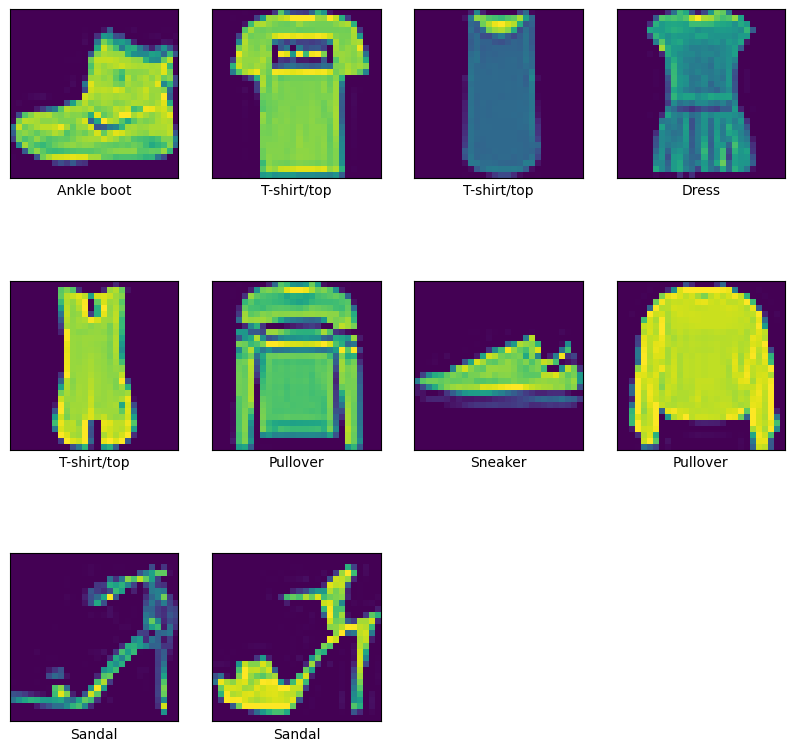

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - accuracy: 0.7858 - loss: 0.5945
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 916us/step - accuracy: 0.8604 - loss: 0.3768
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 810us/step - accuracy: 0.8761 - loss: 0.3377
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 793us/step - accuracy: 0.8840 - loss: 0.3185
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 772us/step - accuracy: 0.8891 - loss: 0.2965
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 860us/step - accuracy: 0.8930 - loss: 0.2824
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 800us/step - accuracy: 0.9002 - loss: 0.2683
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - accuracy: 0.9023 - loss: 0.2624
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 850us/step - accuracy: 0.9049 - loss: 0.2480
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 914us/step - accuracy: 0.9085 - loss: 0.2389


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (10, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Model load: MNIST / Fashion MNIST Dataset
# 데이터셋 로드 및 전처리
fashion_mnist = tf.keras.datasets.fashion_mnist
# or
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
# fashion_mnist 데이터셋을 로드합니다. 이 데이터셋은 10개의 클래스로 구성된 28x28 크기의 흑백 이미지입니다.
# normalized iamges
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
# 이미지 데이터를 정규화합니다. 픽셀 값이 0에서 255 사이의 값이므로, 255.0으로 나누어 0에서 1 사이의 값으로 스케일링합니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Fashion MNIST 데이터셋의 클래스 이름을 정의합니다. 각 클래스는 0부터 9까지의 레이블로 매핑됩니다.

# 데이터 시각화
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()
# matplotlib을 사용하여 학습 데이터셋의 첫 10개 이미지를 시각화합니다.

# 인공 신경망 ANN 모델 구축
model = tf.keras.Sequential() # Sequential 모델을 생성합니다.
model.add(tf.keras.layers.Flatten())
# Flatten 레이어: 28x28 크기의 이미지를 784개의 픽셀로 평탄화합니다.
model.add(tf.keras.layers.Dense(128, activation='relu')) 
# Dense 레이어: 128개의 뉴런을 가진 완전 연결 레이어, 활성화 함수로 ReLU를 사용합니다.
model.add(tf.keras.layers.Dense(64, activation='relu'))
# 두 번째 Dense 레이어: 64개의 뉴런을 가진 완전 연결 레이어, 활성화 함수로 ReLU를 사용합니다.
model.add(tf.keras.layers.Dense(10,activation='softmax'))
# 마지막 Dense 레이어: 10개의 뉴런을 가진 출력 레이어, 활성화 함수로 softmax를 사용하여 다중 클래스 분류를 수행합니다.

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
# optimizer='adam': Adam 옵티마이저를 사용하여 모델을 컴파일합니다.
# loss='sparse_categorical_crossentropy': 손실 함수로 sparse categorical crossentropy를 사용합니다. 이는 레이블이 정수 형태일 때 사용됩니다.
# metrics=['accuracy']: 평가 지표로 정확도를 사용합니다.

# 모델 학습
model.fit(f_image_train, f_label_train, epochs=10, batch_size = 10)
# fit 메서드를 사용하여 모델을 학습시킵니다.
# epochs=10: 전체 데이터셋을 10번 반복하여 학습합니다.
# batch_size=10: 한 번에 10개의 샘플을 사용하여 가중치를 업데이트합니다.

model.summary()
model.save('fashion_mnist.h5')
# summary(): 모델의 구조와 파라미터 수를 출력합니다.
# save('fashion_mnist.h5'): 학습된 모델을 'fashion_mnist.h5' 파일로 저장합니다.


['바탕화면', '.config', '.pki', '.sudo_as_admin_successful', '사진', '.bashrc', '음악', 'ann_pneumonia_history', '.gitconfig', '.vscode', '.jupyter', 'ann_pneumonia.keras', '.cache', 'openvino', 'git-training', '.keras', '이름 없는 문서 1', 'Untitled.ipynb', '다운로드', 'chest_xray', '.ipython', 'fashion_mnist.h5', 'DX-02', 'HW5_ANN_pneumonia_training.py', 'chest-xray-pneumonia', '.bash_history', 'snap', 'Perceptron.py', '템플릿', '문서', '.lesshst', '.local', '.wget-hsts', '비디오', 'Untitled1.ipynb', 'workspce', 'clsss02', '.ipynb_checkpoints', 'temp', 'intro', 'pikachu.jpeg', '.venv', '.dotnet', '공개', 'test1.ipynb', '.profile', '.bash_logout']
1341
normal picture title:  NORMAL2-IM-0981-0001.jpeg
pneumonia picture title: person66_bacteria_323.jpeg


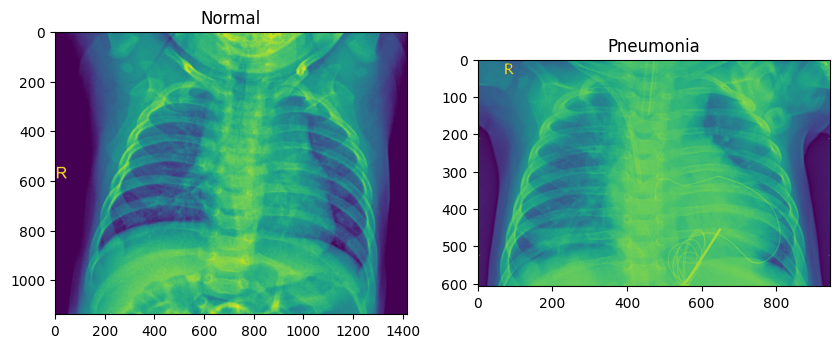

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589,633 (6.06 MB)

 Trainable params: 1,589,633 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.7365 - loss: 0.8732 - val_accuracy: 0.8013 - val_loss: 0.4411
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.8485 - loss: 0.3471 - val_accuracy: 0.8221 - val_loss: 0.4264
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.8683 - loss: 0.3051 - val_accuracy: 0.8109 - val_loss: 0.4078
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.8910 - loss: 0.2614 - val_accuracy: 0.8029 - val_loss: 0.4743
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.8882 - loss: 0.2640 - val_accuracy: 0.7724 - val_loss: 0.5243
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.8928 - loss: 0.2552 - val_accuracy: 0.8237 - val_loss: 0.4446
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.8969 - loss: 0.2557 - val_accuracy: 0.7436 - val_loss: 0.6281
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.8796 - loss: 0

np.int64(0)

In [59]:

# numpy: 수치 계산을 위한 라이브러리.
# matplotlib.pyplot: 데이터 시각화를 위한 라이브러리.
# PIL.Image: 이미지 처리를 위한 라이브러리.
# tensorflow 및 keras: 딥러닝 모델을 구축하고 학습하기 위한 라이브러리.

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
##from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics

# 데이터 경로 설정
mainDIR = os.listdir('/home/taegeom/') # print(mainDIR)
train_folder= '/home/taegeom/chest_xray/train/'
val_folder = '/home/taegeom/chest_xray/val/'
test_folder = '/home/taegeom/chest_xray/test/'

# 데이터 탐색 및 시각화
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# 정상(NORMAL)과 폐렴(PNEUMONIA) 이미지를 무작위로 선택하여 시각화합니다.
# matplotlib을 사용하여 두 이미지를 나란히 표시합니다.

# let's build the CNN model
## HW 5-3. Build model CNN model 구축
model_in = Input(shape=(64,64,3))
x = Flatten()(model_in)
x = Dense(128, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
model_out = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs = model_in, outputs=model_out)
# 입력 크기가 (64, 64, 3)인 이미지를 받는 간단한 Fully Connected Neural Network (FNN) 모델을 구축합니다.
# Flatten()을 사용하여 이미지를 1D 벡터로 평탄화합니다.
# 두 개의 Dense 레이어를 사용하여 128개의 뉴런을 가진 은닉층을 구성합니다.
# 출력층은 1개의 뉴런을 가지고 있으며, sigmoid 활성화 함수를 사용하여 이진 분류를 수행합니다.

num_of_test_samples = 600
batch_size = 32

#Training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_folder,
                                               target_size=(64,64),
                                               batch_size = batch_size,
                                               class_mode = 'binary')
# Test / Validation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_set = train_datagen.flow_from_directory(test_folder,
                                               target_size=(64,64),
                                               batch_size = batch_size,
                                               class_mode = 'binary')

# ImageDataGenerator를 사용하여 데이터 증강을 수행합니다. 이는 이미지를 회전, 확대, 수평 뒤집기 등을 통해 데이터의 다양성을 증가시킵니다.
# flow_from_directory를 사용하여 디렉토리에서 이미지를 불러오고, 지정된 크기로 리사이즈하며, 배치 단위로 데이터를 제공합니다.

model.summary()
# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_model = model.fit(training_set, steps_per_epoch=163, epochs=10, validation_data=test_set, validation_steps=624)
# adam 옵티마이저와 binary_crossentropy 손실 함수를 사용하여 모델을 컴파일합니다.
# fit 메서드를 사용하여 모델을 학습시킵니다. steps_per_epoch와 validation_steps는 각각 한 에포크당 학습 및 검증 단계의 수를 지정합니다.

# 모델 저장 및 평가
import pickle
with open('ann_pneumonia_history', 'wb') as pf:
    pickle.dump(ann_model, pf)
model.save('ann_pneumonia.keras')

test_accu = model.evaluate(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')
# 학습된 모델과 학습 기록을 파일로 저장합니다.
# 테스트 데이터셋을 사용하여 모델의 정확도를 평가합니다.

Y_pred = model.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred) # 테스트 데이터셋에 대한 예측을 수행하고, 예측 결과를 출력합니다.
                                

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.utils import image_dataset_from_directory

img_height = 64
img_width = 64
batch_size = 32

def prepare(ds, suffle = False, augment = False):
    ds = ds.map(lambda x,y : (tf.image.resize(x, [img_height, img_width]), y))
    return ds

model = tf.keras.models.load_model('ann_pneumonia.keras')
model.summary()

test_folder = '/home/taegeom/chest_xray/test/'
test_n = test_folder + 'NORMAL/'
test_p = test_folder + 'PNEUMONIA/'

test_ds = image_dataset_from_directory(test_folder,
                                       validation_split = 0.5, # 2.0
                                       subset = "validation",
                                       seed = 123,
                                       image_size=(img_height, img_width),
                                       batch_size = batch_size)

test_ds = prepare(test_ds)
test_img, test_label = next(iter(test_ds))
test_img = np.array(test_img)
test_label = np.array(test_label)


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,768,901 (18.19 MB)

 Trainable params: 1,589,633 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,179,268 (12.13 MB)

Found 624 files belonging to 2 classes.
Using 312 files for validation.


In [ ]:

# CNN: Convolutional Neural Network (합성곱 신경망)
합성곱 신경망(Convolutional  Neural Network, CNN)이란 딥 러닝의 한 종류로, 주로 이미지 인식 및 처리에 많이 사용되는 알고리듬이다. 
CNN은 일반적인 신경망 구조에 합성곱 계층(Convolutional Layer)과 풀링 계층(Pooling Layer)을 추가함으로써 공간적인 구조 정보를 유지하고, 
이를 바탕으로 이미지 등의 2차원 데이터에서 패턴을 찾아내는 데 특화되어 있다.

합성곱 계층에서는 입력 데이터에 대해 합성곱 연산을 수행하여 여러 개의 필터를 통해 새로운 피처 맵(Feature Map)을 생성한다. 
이렇게 생성된 피처 맵은 풀링 계층을 거치며 크기가 축소되고, 이 과정을 반복하여 깊은 층을 형성한다. 
이런 구조로 인해 CNN은 이미지의 지역적인 특성을 추출하는 데 유리하며, 이는 고차원의 복잡한 데이터를 더욱 간결하게 표현할 수 있게 한다.

# Pooling의 역할
높은 차원을 다루려면 그 차원을 다룰 수 있는 많은수의 파라미터들을 필요로 합니다.
하지만 파라미터가 너무 많아지면 학습 시 over fitting이 발생할 수 있는 문제가 발생하곤 합니다. 
따라서 필터에 사용된 파라미터 수를 줄여서 차원을 감소시킬 방법이 필요합니다.
이런 역할을 CNN에서 해 주는 레이어가 pooling layer 입니다.

# Residual Learning (잔차 학습)


# Class Activation Map (CAM)
이미지를 입력변수로 활용하고 이미지의 class를 맞추는 분류 모델 구조
Convolution layer와 pooling layer를 활용해서 이미지 내 정보를 요약
최종 분류 예측 전에 fully connected layer 활용

# Segmentation
픽셀 단위의 예측을 위한 최초의 end to end 방식이자 지도 사정학습을 활용
동일한 사이즈의 아웃풋을 리턴하기 위해 upsampling 기법을 활용
skip 구조를 활용하여 이미지의 전반적인 정보와 세부 정보를 혼합

완전한 콘볼루션화 , 디콘볼루션 , 스킵 아키텍쳐

# Fully convolutionalization 
FC 계층을 모두 conv 계층으로 대체해 히트맵을 흭득
마지막 특징 맵의 개수는 훈련된 클래스의 개수와 동일

# Deconvolution
특징 맵을 이용한 이미지 분할의 결과물은 이미지 원본 크기에서 픽셀 단위 예측에 사용하기에는 해상도가 너무나 부족
디콘볼루션 이라는 과정을 통해 

# Deconvolution : Transposed Convolution


# Object Detection
1-STAGE
    
2-STAGE
















